# Introduction 

SQL or Structured Query Language is the de facto language used for interacting with ("querying" per industry speak) relational databases. A relational database consists of tables, where each table contains records, or rows of data organized by fields or columns. On the topic of relational databases,  there are many different flavors and forms of relational database management systems (RDMS)&#x2014;SQL Server, MySQL, PostgreSQL, etc. 

In this Kaggle dataset, the database that we are given to work with is a SQLite database. SQLite is not your "classical" database in the sense that it is a self-contained, disk-based database that gets embedded in the application that uses it and, hence, does not require a separate server process.

There seems to be very few notebooks on Kaggle that cover integrating Python with raw SQL queries and, therefore, this notebook aims to bridge this gap. Of course, one could be able to query a database with an ORM like SQLAlchemy along with the advantages of convenience, security, etc. that it brings, but there is still something to be had by learning pure SQL. 

So let's go.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3
import os
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')

Loading BokehJS ...

Unlike my other notebooks, instead of reading data into a pandas dataframe from a CSV (comma-separated value) file type right off the bat, we first will query the database (sqlite3) via SQL commands. I will also show how we can integrate Python with SQL by storing any of our relevant database queries into a pandas dataframe. 

To start off, we have to create a connection to the sqlite3 database as such:

In [2]:
conn = sqlite3.connect('./template_bh/data/database.sqlite')

Once we have our connection setup in Python, we can create a `Cursor` object from which we can call the `execute()` method and perform SQL statements and queries. 

In [3]:
c = conn.cursor()

Having created our cursor object, we can now execute our SQL statement. If you are not too familiar with the following syntax, please bear with me until the following section where I will explain in detail what each SQL command does.

You can distinguish SQL commands in my code (from Python) as they will be embedded within a triple quotation mark `"""`.

In [4]:
for row in c.execute(
                    # SQL statement 
                    """
                        SELECT   * 
                        FROM     Country 
                        LIMIT    2
                        
                     """ ):
    print(row)

(u'AFG', u'Afghanistan', u'Afghanistan', u'Islamic State of Afghanistan', u'AF', u'Afghan afghani', u'Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.', u'South Asia', u'Low income', u'AF', u'2002/03', u'', u'Value added at basic prices (VAB)', u'IDA', u'HIPC', u'Country uses the 1993 System of National Accounts methodology.', u'', u'', u'', u'Actual', u'General trade system', u'Consolidated central government', u'General Data Dissemination System (GDDS)', u'1979', u'Multiple Indicator Cluster Survey (MICS), 2010/11', u'Integrated household survey (IHS), 2008', u'', u'2013/14', u'', 2013, 2000)
(u'ALB', u'Albania', u'Albania', u'Republic of Albania', u'AL', u'Albanian lek', u'', u'Europe & Central Asia', u'Upper middle income', u'AL', u'Original chained constant price data are rescaled.', u'1996'

Now it's all and good that we have managed to print out the first two rows of the data from our Sqlite database. However, I still have a nagging feeling that the current method is inconvenient in the sense that we have to use a `for` loop just to execute our SQL statement. 

Thankfully for us, the pandas library comes with methods that allow one to interact with and query SQL databases and we will explore this in the upcoming section.

### Basics of SQL Queries

Before we continue on with the notebook, I will list here the important SQL statements that are most widely used.  

**SELECT**: Statement used to select rows and columns from a database. 

**FROM**:  Specifies which table in the database you want to direct your query to.

**WHERE**: Clause for filtering for specified value(s).

**GROUP BY**: Aggregating data. Needs to be used in conjunction with SQL aggregating functions like `SUM` and `COUNT`.

**ORDER BY**: Sorting columns in the database. 

**JOIN**: Joins are used to combine tables with one another. 

**UNION**, **INTERSECT/EXCEPT**: Set operations. Unioning in SQL allows one to append tables on top of one another. 

# 1. SQL and Pandas Equivalent statements

In this section I will be comparing a particular SQL statement to its pandas equivalent in the hope that if you are familiar with the pandas syntax but not so much SQL, this may allow you to have a familiar reference point with which to familiarize yourself.

First let us read in the **Country** table. 

In [5]:
# Store Country data in a pandas dataframe via a SQL query
Country = pd.read_sql(
                       """
                       
                        SELECT  * 
                        FROM    Country
                        
                       """, con=conn)

**A.) SELECT, LIMIT and head**

The `SELECT` statement in SQL is probably the most ubiquitous statement as one will need this statement to select records from a database. Normally you will see this being used very often in conjunction with the asterisk symbol: `SELECT*` .  What this does is to select all rows and columns within the database. However, if one wants to select only a certain number of rows, this is where `LIMIT` comes in.

I think it is rather safe to assume that most Kagglers understand the use of invoking the `head()` call on a dataframe. It essentially returns the top (user-specified) number of rows in your data. Equivalently, one can also do the same thing via a SQL query with the use of the `LIMIT` statement as follows:

In [6]:
# Pandas code
Country.head(5)

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",,2013/14,,2013,2000
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011,2013,2006
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",,,2010,2013,2001
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,,East Asia & Pacific,Upper middle income,AS,...,,,2010,,,Yes,2007,,,
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,,Europe & Central Asia,High income: nonOECD,AD,...,,,2011. Population data compiled from administra...,,,Yes,,,2006,


In [7]:
# SQL query 
pd.read_sql(
            """
                SELECT   * 
                FROM     Country 
                LIMIT    5 
                
            """, con=conn)

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",,2013/14,,2013,2000
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011,2013,2006
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",,,2010,2013,2001
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,,East Asia & Pacific,Upper middle income,AS,...,,,2010,,,Yes,2007,,,
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,,Europe & Central Asia,High income: nonOECD,AD,...,,,2011. Population data compiled from administra...,,,Yes,,,2006,


**B.) WHERE and Boolean Indexing**

The SQL `WHERE` clause is mainly used for filtering records of interest. Therefore, if the records fulfill the conditions as laid out by the `WHERE` clause, then that record will be returned. The equivalent of this in Python and pandas is that of Boolean Indexing&#x2014;a.k.a., passing into the DataFrame another DataFrame in a comparison statement as follows:

In [8]:
# Pandas Boolean Indexing
Country[Country['CountryCode'] == 'AFG']

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",,2013/14,,2013,2000


In [9]:
# SQL WHERE clause
pd.read_sql(
        """ 
            SELECT   * 
            FROM     Country 
            WHERE    CountryCode = 'AFG'
            
        """, con=conn)

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",,2013/14,,2013,2000


**C.) GROUP BY and dataframe aggregation**

The `GROUP BY` clause is very useful when aggregations are required to be generated. When I say aggregations, these are taken to mean things (in SQL speak) such as `COUNT`, `MAX`, `MIN`, `SUM`, etc. 

In the following example, I will perform an aggregation on the _Country_ dataset by counting (`COUNT` function) the number of records that belong to a certain _Region_. As a rule of thumb, to know what we have to add to our `GROUP BY` statement is simply the column that we want to aggregate on (_Region_ in our case).

In [10]:
# SQL GROUP BY Clause
pd.read_sql(
        """ 
            SELECT      Region
                        ,COUNT(*) AS [Count]
            FROM        Country 
            GROUP BY    Region
            ORDER BY    2 DESC
            
        """, con=conn)

,Region,Count
0,Europe & Central Asia,57
1,Sub-Saharan Africa,48
2,Latin America & Caribbean,41
3,East Asia & Pacific,36
4,,33
5,Middle East & North Africa,21
6,South Asia,8
7,North America,3


I snuck in an `ORDER BY` statement and what this does is sort the data in descending order (`DESC` keyword). Anyway, we can see that this `GROUP BY` does count all the records (aggregate) that belong to a particular region and and then outputs the result in an ordered, tabular format. 

Particularly interesting is the fact that we have an empty string as one of our categories in _Region_ and there are 33 records in the database that can be attributed to this. Perhaps this could be brought up as a data quality issue and definitely warrants further investigation.

**D.) SQL JOIN**

The `JOIN` clause in SQL is used to combine records from two or more tables, and the way the records are combined are based on a related column between these tables. There are four main types of `JOIN`s in SQL: `INNER`, `LEFT`, `RIGHT`, and `OUTER JOIN`. 

`INNER` returns rows that are common to both tables while `OUTER` returns all records when there is a match in either the left or the right table. `LEFT` returns all the rows from the left table as well as all matching rows from the right (i.e., for rows in the right table that are not matching, it will return `NULL` values).

In [11]:
# Let's do a LEFT JOIN on some subqueries 
pd.read_sql(
        """ 
           
            SELECT      A.CountryCode
                        ,B.LatestPopulationCensus
                        ,B.SourceOfMostRecentIncomeAndExpenditureData
                        ,B.ShortName
            FROM       ( 
                            -- First subquery (i.e the Left table)
                            
                           SELECT      CountryCode
                                        ,LatestPopulationCensus
                                        ,SourceOfMostRecentIncomeAndExpenditureData
                                        ,ShortName
                           FROM        Country
                           WHERE       CountryCode IN ('AFG','ALB', 'ASM', 'BEL')
                        ) AS A
            LEFT JOIN   (
                            -- Second subquery (i.e the right table )
                            
                            SELECT      CountryCode
                                        ,LatestPopulationCensus
                                        ,SourceOfMostRecentIncomeAndExpenditureData
                                        ,ShortName
                            FROM        Country AS A
                            WHERE       CountryCode IN ('AFG','ARM', 'URY', 'BEL')
                            
                          ) AS B
            ON          A.CountryCode = B.CountryCode    
            
        """, con=conn)

,A.CountryCode,B.LatestPopulationCensus,B.SourceOfMostRecentIncomeAndExpenditureData,B.ShortName
0,AFG,1979,"Integrated household survey (IHS), 2008",Afghanistan
1,ALB,None,None,None
2,ASM,None,None,None
3,BEL,2011,"Integrated household survey (IHS), 2000",Belgium


So as we can see from the `LEFT JOIN`, it does return all the records from the left table (`AFG`,`ALB`, `ASM`, `BEL`). However, nothing was returned from the right table for the codes `ALB` and `ASM` and, hence, a value of `None` in the columns returned from that table.

**E) UNION, INTERSECT, and EXCEPT**

SQL also comes with a handful of useful Set operations, namely that of `UNION`, `INTERSECT`, and the `EXCEPT` statements. These statements perform exactly as their name suggests (set theory)&#x2014;`UNION` combines the output from two or more `SELECT - FROM` statements (it removes duplication in rows while `UNION ALL` includes duplicates). `INTERSECT` returns rows common to both top and bottom query, while `EXCEPT` returns rows from the top query that are not in the bottom query.

In [12]:
# UNION 
pd.read_sql(
        """ 
                           SELECT      CountryCode
                                        ,LatestPopulationCensus
                                        ,SourceOfMostRecentIncomeAndExpenditureData
                                        ,ShortName
                           FROM        Country
                           WHERE       CountryCode IN ('AFG','ALB', 'ASM', 'BEL')
                       
                           UNION
                           
                           SELECT      CountryCode
                                        ,LatestPopulationCensus
                                        ,SourceOfMostRecentIncomeAndExpenditureData
                                        ,ShortName
                           FROM        Country AS A
                           WHERE       CountryCode IN ('AFG','ARM', 'URY', 'BEL')
            
        """, con=conn)

,CountryCode,LatestPopulationCensus,SourceOfMostRecentIncomeAndExpenditureData,ShortName
0,AFG,1979,"Integrated household survey (IHS), 2008",Afghanistan
1,ALB,2011,Living Standards Measurement Study Survey (LSM...,Albania
2,ARM,2011,"Integrated household survey (IHS), 2012",Armenia
3,ASM,2010,,American Samoa
4,BEL,2011,"Integrated household survey (IHS), 2000",Belgium
5,URY,2011,"Integrated household survey (IHS), 2013",Uruguay


In [13]:
# INTERSECT 
pd.read_sql(
        """ 
                           SELECT      CountryCode
                                        ,LatestPopulationCensus
                                        ,SourceOfMostRecentIncomeAndExpenditureData
                                        ,ShortName
                           FROM        Country
                           WHERE       CountryCode IN ('AFG','ALB', 'ASM', 'BEL')
                       
                           INTERSECT
                           
                           SELECT      CountryCode
                                        ,LatestPopulationCensus
                                        ,SourceOfMostRecentIncomeAndExpenditureData
                                        ,ShortName
                           FROM        Country AS A
                           WHERE       CountryCode IN ('AFG','ARM', 'URY', 'BEL')
            
        """, con=conn)

,CountryCode,LatestPopulationCensus,SourceOfMostRecentIncomeAndExpenditureData,ShortName
0,AFG,1979,"Integrated household survey (IHS), 2008",Afghanistan
1,BEL,2011,"Integrated household survey (IHS), 2000",Belgium


# 2. Data Analysis and Visualizations

Having discussed at some length basic SQL statements and how we can interact and query SQL databases through Python, let us now carry on with our World Developmental analysis. To start off, I will create a dataframe via a query of the _Indicator_ table with a handful of manually chosen indicators (as the full table contains too many indicators for this notebook).

A quick description of the indicators is as follows:

**AG.LND.PRCP.MM**:  Average precipitation in depth (mm per year).

**EG.ELC.ACCS.ZS**:  Access to electricity (% of population).

**EG.ELC.FOSL.ZS**:  Electricity production from oil, gas, and coal sources (% of total).

**SG.VAW.REAS.ZS**: Women who believe that a husband is justified in beating his wife (any of the five reasons).

**SM.POP.NETM**: Net migration.

In [14]:
Indicators = pd.read_sql(""" SELECT   * 
                             FROM     Indicators 
                             WHERE    IndicatorCode IN 
                                      (  'AG.LND.PRCP.MM, AG.LND.FRST.K2'
                                       , 'EG.ELC.ACCS.ZS', 'EG.ELC.FOSL.ZS'
                                       , 'EN.POP.DNST', 'SG.VAW.REAS.ZS'
                                       , 'SM.POP.NETM', 'SP.POP.65UP.TO.ZS'
                                       , 'FI.RES.TOTL.DT.ZS', 'GC.DOD.TOTL.GD.ZS'
                                       , 'MS.MIL.XPND.GD.ZS','SI.POV.GINI'
                                       , 'IP.JRN.ARTC.SC', 'SE.ADT.1524.LT.ZS'
                                      )  
                        """, con=conn)

### 2A. GINI Index analysis

Starting off with our analysis, we first take a look at the GINI index of some of the countries we have in our dataset. As a quick primer, the GINI index (in its normalized form) is a statistical measure used to represent the income or wealth distribution of a nation's citizens. Therefore, as a consequence, it has come to represent a very ubiquitous measure of inequality in a country. 

The data given in the index has not yet been normalized, but we are primarily interested in the trend over the years given in the data. Anyway, I'll start off by creating a gini dataframe that only stores GINI data as follows:

In [15]:
#Regions = ['ARB', 'EUU', 'LCN' , 'NAC',  'EAS', 'SSF', 'World']
gini = Indicators[Indicators['IndicatorCode']== 'SI.POV.GINI']

**Seaborn subplots**

Next, I will utilize the _Seaborn_ plotting library to plot some scatter points of the GINI index for various countries as follows:

In [16]:
gini.CountryCode.unique()

array([u'AUS', u'BRA', u'CAN', u'CHN', u'CRI', u'ETH', u'THA', u'URY',
       u'VEN', u'BGD', u'IND', u'IDN', u'MYS', u'MEX', u'MAR', u'NPL',
       u'RWA', u'BWA', u'CIV', u'NGA', u'PER', u'PHL', u'POL', u'LKA',
       u'TUN', u'ARG', u'DOM', u'GTM', u'HND', u'IRN', u'ISR', u'JOR',
       u'LSO', u'USA', u'CHL', u'ECU', u'GHA', u'HUN', u'MRT', u'PAK',
       u'SVN', u'TUR', u'BLR', u'COL', u'HRV', u'CZE', u'EST', u'JAM',
       u'KAZ', u'KGZ', u'LVA', u'LTU', u'MDA', u'RUS', u'SVK', u'TTO',
       u'TKM', u'UKR', u'UZB', u'BGR', u'PAN', u'ROM', u'UGA', u'BOL',
       u'PRY', u'SLV', u'GIN', u'SEN', u'TZA', u'ZMB', u'BDI', u'CAF',
       u'KEN', u'LAO', u'NER', u'VNM', u'BLZ', u'GNB', u'MDG', u'NIC',
       u'ZAF', u'BFA', u'KHM', u'MLI', u'SWZ', u'DZA', u'AZE', u'MNG',
       u'LCA', u'ALB', u'ARM', u'CMR', u'GEO', u'MOZ', u'PNG', u'MWI',
       u'GMB', u'GUY', u'MKD', u'MDV', u'SYC', u'SUR', u'TJK', u'AGO',
       u'FSM', u'STP', u'BIH', u'CPV', u'HTI', u'TMP', u'DJI', u'FJI',
      

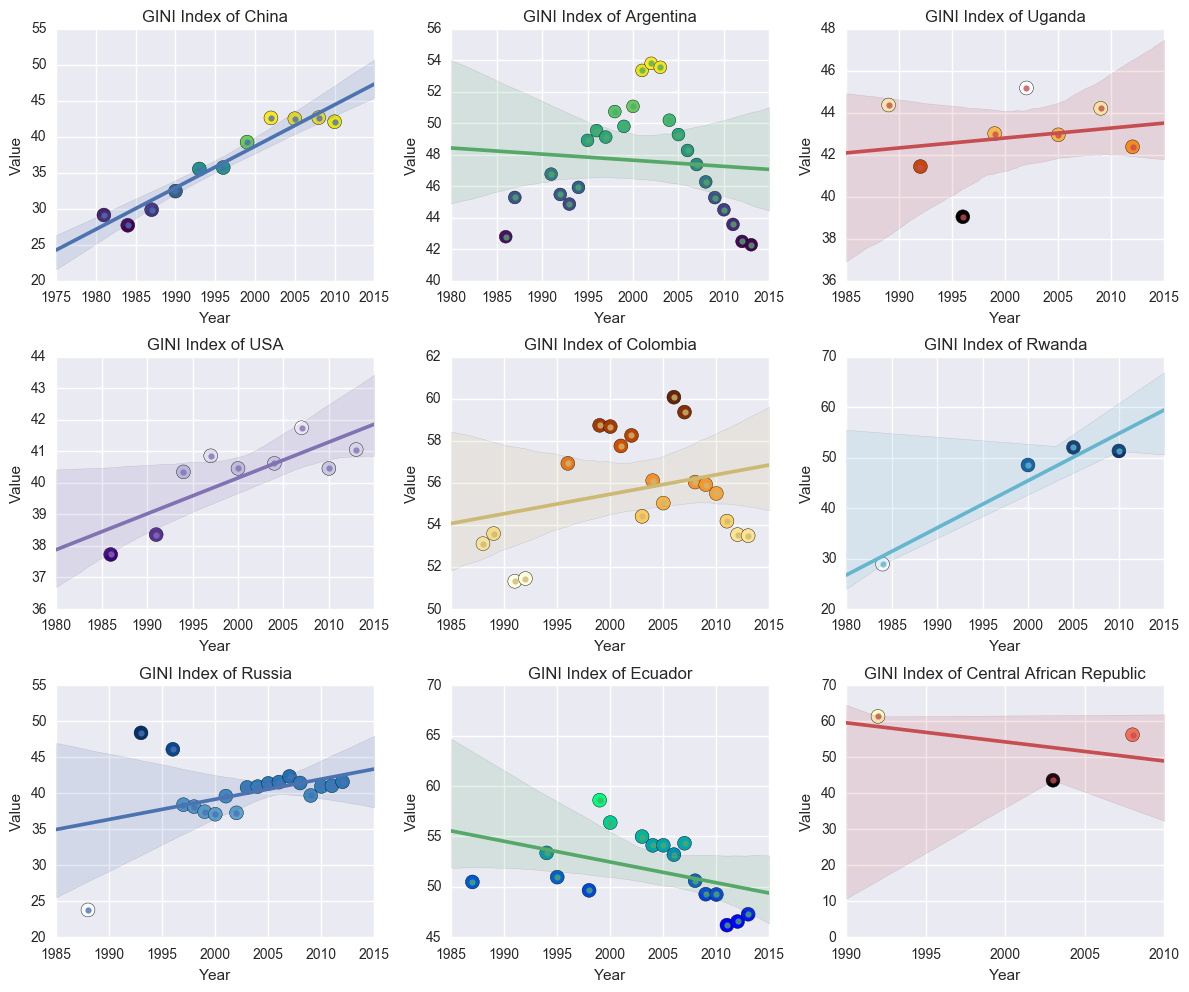

In [17]:
# Plotting a Subplot of the Seaborn regplot
f, ((ax1, ax2, ax3), (ax4,ax5,ax6), (ax7, ax8, ax9)) = plt.subplots(3,3,figsize=(12,10))

# Plot of GINI index of China
points = ax1.scatter(gini[gini['CountryCode'] == 'CHN']["Year"], gini[gini['CountryCode'] == 'CHN']["Value"],
                     c=gini[gini['CountryCode'] == 'CHN']["Value"], s=100, cmap="viridis")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'CHN'], ax=ax1)
ax1.set_title("GINI Index of China")

# Plot of GINI of Argentina
points = ax2.scatter(gini[gini['CountryCode'] == 'ARG']["Year"], gini[gini['CountryCode'] == 'ARG']["Value"],
                     c=gini[gini['CountryCode'] == 'ARG']["Value"], s=85, cmap="viridis")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'ARG'], ax=ax2)
ax2.set_title("GINI Index of Argentina")

points = ax3.scatter(gini[gini['CountryCode'] == 'UGA']["Year"], gini[gini['CountryCode'] == 'UGA']["Value"],
                     c=gini[gini['CountryCode'] == 'UGA']["Value"], s=100, cmap="afmhot")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'UGA'], ax=ax3)
ax3.set_title("GINI Index of Uganda")

points = ax4.scatter(gini[gini['CountryCode'] == 'USA']["Year"], gini[gini['CountryCode'] == 'USA']["Value"],
                     c=gini[gini['CountryCode'] == 'USA']["Value"], s=100, cmap="Purples_r")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'USA'], ax=ax4)
ax4.set_title("GINI Index of USA")

points = ax5.scatter(gini[gini['CountryCode'] == 'COL']["Year"], gini[gini['CountryCode'] == 'COL']["Value"],
                     c=gini[gini['CountryCode'] == 'COL']["Value"], s=100, cmap="YlOrBr")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'COL'], ax=ax5)
ax5.set_title("GINI Index of Colombia")

points = ax6.scatter(gini[gini['CountryCode'] == 'RWA']["Year"], gini[gini['CountryCode'] == 'RWA']["Value"],
                     c=gini[gini['CountryCode'] == 'RWA']["Value"], s=100, cmap="Blues")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'RWA'], ax=ax6)
ax6.set_title("GINI Index of Rwanda")

points = ax7.scatter(gini[gini['CountryCode'] == 'RUS']["Year"], gini[gini['CountryCode'] == 'RUS']["Value"],
                     c=gini[gini['CountryCode'] == 'RUS']["Value"], s=100, cmap="Blues")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'RUS'], ax=ax7)
ax7.set_title("GINI Index of Russia")

points = ax8.scatter(gini[gini['CountryCode'] == 'ECU']["Year"], gini[gini['CountryCode'] == 'ECU']["Value"],
                     c=gini[gini['CountryCode'] == 'ECU']["Value"], s=100, cmap="winter")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'ECU'], ax=ax8)
ax8.set_title("GINI Index of Ecuador")

points = ax9.scatter(gini[gini['CountryCode'] == 'CAF']["Year"], gini[gini['CountryCode'] == 'CAF']["Value"],
                     c=gini[gini['CountryCode'] == 'CAF']["Value"], s=100, cmap="magma")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'CAF'], ax=ax9)
ax9.set_title("GINI Index of Central African Republic")
sns.set_style(style="dark")
plt.tight_layout()

**Takeaway from the Plots**

As one can observe from the Seaborn subplots above, I have attempted to group countries column-wise, accordingly. The left-most column contains countries that we would now think of as Global powers in the political scene (USA, China, and Russia). It is interesting to note that for these countries, the measurement of inequality has been a clear and increasing trend over the decades. 

For the middle column, I have grouped three South American countries (Argentina, Colombia, and Ecuador),  while the right-most column contains African countries.

### 2B. Youth Literacy Rate (% of population)

Onto our next indicator, which has an indicator code of **SE.ADT.1524.LT.ZS**: Youth Literacy rates. Previously on one of my other kernels, I had published a piece of analysis on global youth unemployment and it seemed to hit quite a chord with readers, especially around the high rates of youth unemployment prevalent around European countries for the past half decade.

Let us plot an interactive barplot via the _Plotly_ visualization library to observe how Youth literacy rates have changed over two decades&#x2014;from 1990 to 2010.

In [18]:
# Barplots of Youth literacy rates in 1990
data = Indicators[Indicators['IndicatorCode'] == 'SE.ADT.1524.LT.ZS'][Indicators['Year'] == 1990]
x, y = (list(x) for x in zip(*sorted(zip(data['Value'].values, data['CountryName'].values), 
                                                            reverse = False)))

# Plotting using Plotly 
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Portland',
        reversescale = True
    ),
    name='Percentage of Youth Literacy Rate',
    orientation='h',
)

layout = dict(
    title='Barplot of Youth Literacy Rate in 1990',
     width = 680, height = 1500,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

# Barplot of Youth literacy rates in 2010
data = Indicators[Indicators['IndicatorCode'] == 'SE.ADT.1524.LT.ZS'][Indicators['Year'] == 2010]
x, y = (list(x) for x in zip(*sorted(zip(data['Value'].values, data['CountryName'].values), 
                                                            reverse = False)))

# Plotting using Plotly 
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Portland',
        reversescale = True
    ),
    name='Percentage of Youth Literacy Rate',
    orientation='h',
)

layout = dict(
    title='Barplot of Youth Literacy Rate in 2010',
     width = 680, height = 1500,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

### 2C. Access to Electricity

Let's now inspect another very important indicator: a country's access to electricity. For this, let us plot a heatmap. I will switch to using the visualization library _Bokeh_ for this task. 

In [19]:
# Create some useful helper variables
data = Indicators[Indicators['IndicatorCode'] == 'EG.ELC.ACCS.ZS']
data['Year'] = [str(x) for x in data['Year']]
years = list(data['Year'].unique())
country = [
     u'Jordan', u'Kazakhstan', u'Kenya', u'Kiribati',
       u'Korea, Dem. Rep.', u'Korea, Rep.', u'Kosovo', u'Kuwait',
       u'Kyrgyz Republic', u'Lao PDR', u'Latvia', u'Lebanon', u'Lesotho',
       u'Liberia', u'Libya', u'Liechtenstein', u'Lithuania', u'Luxembourg',
       u'Macao SAR, China', u'Macedonia, FYR', u'Madagascar', u'Malawi',
       u'Malaysia', u'Maldives', u'Mali', u'Malta', u'Marshall Islands',
       u'Mauritania', u'Mauritius', u'Mexico', u'Micronesia, Fed. Sts.',
       u'Moldova', u'Monaco', u'Mongolia', u'Montenegro', u'Morocco',
       u'Mozambique', u'Myanmar', u'Namibia', u'Nepal', u'Netherlands',
       u'New Caledonia', u'New Zealand', u'Nicaragua', u'Niger',
       u'Nigeria', u'Norway', u'Oman', u'Pakistan', u'Palau', u'Panama',
       u'Papua New Guinea', u'Paraguay', u'Peru', u'Philippines',
       u'Poland', u'Portugal', u'Puerto Rico', u'Qatar', u'Romania',
       u'Russian Federation', u'Rwanda', u'Samoa', u'San Marino',
       u'Sao Tome and Principe', u'Saudi Arabia', u'Senegal', u'Serbia',
       u'Seychelles', u'Sierra Leone', u'Singapore', u'Slovak Republic',
       u'Slovenia', u'Solomon Islands', u'Somalia', u'South Africa',
       u'South Sudan', u'Spain', u'Sri Lanka' u'Sudan', u'Suriname',
       u'Swaziland', u'Sweden', u'Switzerland', u'Syrian Arab Republic',
       u'Tajikistan', u'Tanzania', u'Thailand', u'Timor-Leste', u'Togo',
       u'Tonga', u'Trinidad and Tobago', u'Tunisia', u'Turkey',
       u'Turkmenistan', u'Tuvalu', u'Uganda',
       u'Ukraine', u'United Arab Emirates', u'United Kingdom',
       u'United States', u'Uruguay'
]

In [20]:
from math import pi

from bokeh.io import show
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper
# data = data.set_index('Year')
# this is the colormap from the original NYTimes plot
colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
mapper = LinearColorMapper(palette=colors)
# Set up the data for plotting. We will need to have values for every
# pair of year/month names. Map the rate to a color.
countr = []
year = []
color = []
rate = []
for y in years:
    for m in country:
        countr.append(m)
        year.append(y)
#         d[(d['x']>2) & (d['y']>7)]
        monthly_rate = data[(data['CountryName']==m) & (data['Year']==y)]['Value']
        rate.append(monthly_rate)

source = ColumnDataSource(
    data=dict(country=countr, year=year, rate=rate)
)

TOOLS = "hover,save,pan,box_zoom,wheel_zoom"

p = figure(title="Access to Electricity",
           x_range=years, y_range=list(reversed(country)),
           x_axis_location="above", plot_width=900, plot_height=900,
           tools=TOOLS)

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = pi / 3

p.rect(x="year", y="country", width=1, height=1,
       source=source,
       fill_color={'field': 'rate', 'transform': mapper},
       line_color=None)

p.select_one(HoverTool).tooltips = [
#     ('date', '@countr @year'),
    ('rate', '@rate'),
]

show(p)      # show the plot

### 2D. Women who believe husband is justified in beating the wife

Now this indicator is most controversial, but also the one that really caught my attention. 

In [21]:
data = Indicators[Indicators['IndicatorCode'] == 'SG.VAW.REAS.ZS']

In [22]:
data = Indicators[Indicators['IndicatorCode'] == 'SE.ADT.1524.LT.ZS']
data['Year'] = [str(x) for x in data['Year']]
years = ['2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014']
country = ['Burkina Faso', 'Central African Republic', 'Kuwait', 'Turkey',
       'United Arab Emirates', 'Uruguay', 'Bolivia', 'Cameroon',
       'Egypt, Arab Rep.', 'Iran, Islamic Rep.', 'Mali', 'New Caledonia',
       'Swaziland', 'Tonga', 'Maldives', 'Poland', 'Rwanda', 'Afghanistan',
       'Benin', 'Burundi', 'Guinea-Bissau', 'Jordan', 'Vanuatu', 'Vietnam',
       'American Samoa', 'Argentina', 'Brazil', 'Comoros', 'Guam',
       'Hungary', 'Indonesia', 'Malaysia', 'Mexico', 'Mozambique', 'Palau',
       'Panama', 'Philippines', 'Puerto Rico', 'Singapore', 'South Africa',
       'Thailand', 'Trinidad and Tobago', 'Bahrain', 'Bangladesh',
       'Brunei Darussalam', 'Cuba', 'Dominican Republic', 'Greece',
       'India', 'Italy', 'Macao SAR, China', 'Nepal', 'Pakistan', 'Peru',
       'Portugal', 'Sao Tome and Principe', 'Spain', 'Sri Lanka',
       'Syrian Arab Republic', 'Venezuela, RB', 'Chile', 'China',
       'Ecuador', 'Haiti', 'Morocco', 'Paraguay', 'Zimbabwe', 'Israel',
       'Myanmar', 'Costa Rica', 'Liberia', 'Libya', 'Tunisia', 'Malta',
       'Qatar', 'Algeria', 'Malawi', 'Seychelles', "Cote d'Ivoire",
       'Senegal', 'Tanzania', 'Armenia', 'Belarus', 'Estonia',
       'Kazakhstan', 'Latvia', 'Lithuania', 'Moldova','Lesotho', 'Madagascar', 'Mauritania', 'Mongolia',
       'Papua New Guinea', 'Sudan', 'Togo', 'Uzbekistan', 'Albania',
       'Angola', 'Bulgaria', 'Congo, Dem. Rep.', 'Honduras', 'Nicaragua',
       'Niger', 'Ukraine', 'Eritrea', 'Georgia', 'Oman', 'Sierra Leone',
       'Suriname', 'Bhutan', 'Cayman Islands', 'Lebanon',
       'Korea, Dem. Rep.', 'South Sudan', 'Guyana', 'Timor-Leste',
       'Congo, Rep.', 'Montenegro', 'Serbia', 'Austria']

In [23]:
from math import pi

from bokeh.io import show
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper
# data = data.set_index('Year')
# this is the colormap from the original NYTimes plot
colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
mapper = LinearColorMapper(palette=colors)
# Set up the data for plotting. We will need to have values for every
# pair of year/month names. Map the rate to a color.
countr = []
year = []
color = []
rate = []
for y in years:
    for m in country:
        countr.append(m)
        year.append(y)
#         d[(d['x']>2) & (d['y']>7)]
        monthly_rate = data[(data['CountryName']==m) & (data['Year']==y)]['Value']
        rate.append(monthly_rate)

source = ColumnDataSource(
    data=dict(country=countr, year=year, rate=rate)
)

TOOLS = "hover,save,pan,box_zoom,wheel_zoom"

p = figure(title="Women who believe Husbands are justified in beating wifes",
           x_range=years, y_range=list(reversed(country)),
           x_axis_location="above", plot_width=900, plot_height=900,
           tools=TOOLS)

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = pi / 3

p.rect(x="year", y="country", width=1, height=1,
       source=source,
       fill_color={'field': 'rate', 'transform': mapper},
       line_color=None)

p.select_one(HoverTool).tooltips = [
#     ('date', '@countr @year'),
    ('rate', '@rate'),
]

show(p)      # show the plot